<a href="https://colab.research.google.com/github/jdance231/Data-Science-Principles-and-Practices/blob/main/Jamie_Dance_DSP%26P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamie Dance Data Science Principles and Practices


-------------------------------------------------------------------------------------------------


**Import all necessary packages:**

In [ ]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1 - Maximum Likelihood Inference


**Import the QuietDonSentenceLenghts data and calculate the sample mean and standard deviation.**

In [ ]:
QuietDonSentenceLenghts = pd.read_csv("QuietDonSentenceLenghts.csv", header=None)

x = QuietDonSentenceLenghts.loc[:,0].values # Create an array

QuietDonSentenceLenghts.head()

,0
0,6
1,25
2,12
3,10
4,16


We have have created a new variable x that contains the regressor coloumn Sentence Lengths for our analysis

In [ ]:
mu = np.mean(QuietDonSentenceLenghts.loc[:,0])           # sample mean
sigma_hat = np.std(QuietDonSentenceLenghts.loc[:,0], ddof=1) # sample standard deviation
 
print('Sample mean mu_hat:', mu)
print('Sample standard deviation sigma_hat:', sigma_hat)

Sample mean mu_hat: 12.67313829787234
Sample standard deviation sigma_hat: 9.124034996812505


#### A histogram of the values within the QuietDonSentenceLenghts data

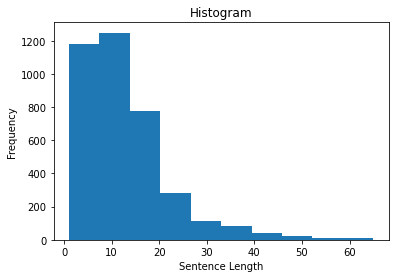

In [ ]:
plt.title("Histogram")
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.hist(QuietDonSentenceLenghts, 10) # 10 bins, each bin stands for an equal-distance range. Some range might not have a value though.
plt.show()


### Fitting a Poisson distribution to the sentence length data

Definition of the Poisson distribution, the probability mass function (pmf):

$P[Y=y]= e^{−\mu} \frac{\mu^y}{y!} $, where $\mu$ is the parameter. 

In practice, however, the dependent variable ($y$) is usually modelled as a function of explanatory variables $x_1, \cdots, x_m$. Hence, the distribution of $y$ needs to be conditioned on the vector of explanatory variables $x_1, \cdots, x_m$.

$P(Y=y\mid x_1, \cdots, x_m)= \frac{\mu^y}{y!} e^{−\mu}$
where $\mu= \exp(\beta_0+ \beta_1 x_1+\cdots +\beta_m x_m)$

[Note that statsmodels does *not* simply use $\beta_0+ \beta_1 x_1+\cdots +\beta_m x_m$, but $\exp(\beta_0+ \beta_1 x_1+\cdots +\beta_m x_m)$!]

In this case, $\beta_0, \beta_1, \cdots, \beta_m$ are the parameters of the model.

Namely, for this small dataset, we have 3760 **observations** and 1 **explanatory variable** (or **regressor**): $x_0$. For our data we only need to use a very simple version, namely, there is only a constant term $\beta_0$ (i.e., no $\beta_1$, $\beta_2$, $x_1, x_2$).

In [ ]:
from statsmodels.api import Poisson

X = np.ones_like(x)

PoissonDistribution = sm.Poisson(x,X).fit()

print(PoissonDistribution.summary(()))
print('AIC: ', PoissonDistribution.aic)
print('Exponentional of Parameters: ', np.exp(PoissonDistribution.params))

Optimization terminated successfully.
         Current function value: 4.947456
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:                     ()   No. Observations:                 3760
Model:                        Poisson   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:                   0.000
Time:                        11:32:10   Log-Likelihood:                -18602.
converged:                       True   LL-Null:                       -18602.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.005    554.347      0.000       2.531       2.548
AIC:  37206.86706437265
Expon

We can see see that MLE returns that $\beta_0=2.5395$.

The notation for our Poisson distribution:
$$\mathcal{Pois}(\lambda) = \mathcal{Pois}(12.6731383) $$

In [ ]:
PoissonDistribution.predict()

array([12.6731383, 12.6731383, 12.6731383, ..., 12.6731383, 12.6731383,
       12.6731383])

#### Using a library function we can perform maximisation.

In [ ]:
from scipy.stats import poisson
from scipy.optimize import minimize

def PoissonSentence(mu):
    l = poisson.logpmf(x, mu)
    return -np.sum(l)

In [ ]:
minimize(PoissonSentence,5).x

array([12.67314125])

### Fitting a Negative binomial distribution to the sentence length data

Consider a **negative binomial regression model** for count data with log-likelihood (type NB-2) function expressed as:

$$\mathcal{L}(\beta_j; y, \alpha) = \sum_{i=1}^n y_i ln
\left ( \frac{\alpha exp(X_i^T\beta)}{1+\alpha exp(X_i'\beta)} \right ) -
\frac{1}{\alpha} ln(1+\alpha exp(X_i^T\beta)) + ln \Gamma (y_i + 1/\alpha) - ln \Gamma (y_i+1) - ln \Gamma (1/\alpha)$$

with a matrix of regressors 𝑋, a vector of coefficients $\beta$, and the negative binomial heterogeneity parameter $\alpha$.

In [ ]:
from statsmodels.discrete.discrete_model import NegativeBinomial

X = np.ones_like(x)

NBDistribution = sm.NegativeBinomial(x, X).fit()
print(NBDistribution.summary())
print('AIC: ', NBDistribution.aic)

Optimization terminated successfully.
         Current function value: 3.417881
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                 3760
Model:               NegativeBinomial   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:              -1.942e-12
Time:                        11:32:10   Log-Likelihood:                -12851.
converged:                       True   LL-Null:                       -12851.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.011    230.9

We can see that the MLE returns the $\beta_0=2.5395$ and $\alpha=0.3756$.

The notation for our Negative Binomial distribution: 
$$ r = \frac{1}{\alpha} => r = \frac{1}{0.3756} => r = 2.6624 $$  

$$ p = \frac{r}{\mu} => p = \frac{2.6624}{12.6731} => p = 0.21 $$

$$ \mathcal{NB}(r|p) = \mathcal{NB}(2.6624 | 0.21) $$

In [ ]:
NBDistribution.predict()

array([12.6731383, 12.6731383, 12.6731383, ..., 12.6731383, 12.6731383,
       12.6731383])

### Explain the key concepts of maximum likelihood inference and how these are implemented in your code.

Maximum likelihood aims to estimate parameters that maximise the logarithm of the likelihood of the model given observations

$$\mathcal{L}(\theta|x) = \mathcal{p}(x|\theta) = f(x_1;\theta)*,...,*f(x_n;\theta) $$

* for continuous RVs, f(x;$\theta$) is the probability density function (pdf)
* for discrete RVs, f(x;$\theta$) is the probability mass function (pmf)
* Note: the likelihood function follows from iid samples and joint distributions

It chooses the parameter that provides the largest value of the likelihood function (this value serves as the estimate of the parameter).

General Steps:
* Specifying the likelihood function (in terms of the parameters to be estimated)
* Maximising the likelihood function

#### Limitations of MLE
* Nonexistence of an MLE
    * e.g., when applying MLE to some variance of uniform distribution
    
* Non-uniqueness of an MLE
    * e.g., when applying MLE to a mixture of two distributions
    
* The value of $\theta$ that maximises the pdf of the data given $\theta$ is the value of $\theta$ that assigned the highest probability to seeing the observed data.
    * Not necessarily the value of the parameter that appears to be most likely given to the data.
    
#### Application in the code
For both applications of Poisson and Negative Binomial to the data the *fit()* function is used to find the maximum likelihood estimate, which is then displayed within a summary.

### Compare how well the two distributions fit the data and discuss the results.
#### The Akaike Information Criterion (AIC)

The Akaike Information Criterion (AIC) was created by statistician Hirotugu Akaike and gives a measure of the relative fit of several statistical models to data. It can be used to select which model best represents the data. A model with a smaller value of AIC is considered better.
The AIC is calculated as:

$$ AIC = 2k - 2logL(\hat{\theta}|x)$$

where x is the observed data, k is the number of parameters in the model, $\hat{\theta}$ is the maximum likelihood estimate (MLE) of the parameters and $L(\hat{\theta}|x)$ is the likelihood of the model.

From the Poisson distribution summary output it is possible to see that the AIC value is: 37206.8670, whereas from the Negative Binomial summary output it is possible to see that the AIC value is: 25706.4631. This suggests that the Negative Binomial distribution fits the data better.


#### p-value
The p-value is a measure of the evidence for rejecting $H_0$.

   * p-value: P(data at least as extreme as the test statistic | $H_0$ )
   
Parameters from both tests are very significant as the p value < 0.001. This suggests that both distributions are a good fit for the data. Although this is likely because the data consists of only one column.


#### Some other notes:
- Both distributions show no improvement or decline in Log-Likelihood between the null model and the fitted model.

- Standard error is higher for Negative Binomial constant value. This could suggest a slightly worse fit for $B_0$.

**• Produce plots where necessary to illustrate your results.**

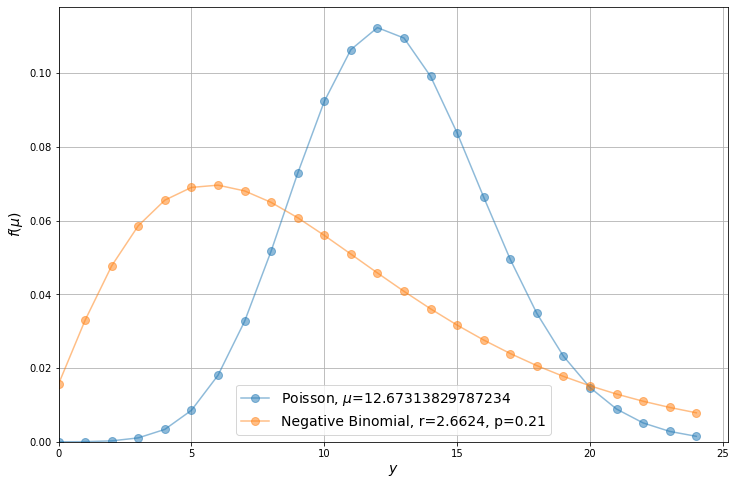

In [ ]:
from matplotlib import pyplot as plt
from scipy.stats import poisson
from scipy.stats import nbinom


y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

distribution = []
for y_i in y_values:
    distribution.append(ss.poisson(mu).pmf(y_i))
ax.plot(y_values,
        distribution,
        label=f'Poisson, $\mu$={mu}',
        alpha=0.5,
        marker='o',
        markersize=8)

r = 2.6624
p = 0.21
distribution = []
for y_i in y_values:
    distribution.append(ss.nbinom(r,p).pmf(y_i))
ax.plot(y_values,
        distribution,
        label=f'Negative Binomial, r={r}, p={p}',
        alpha=0.5,
        marker='o',
        markersize=8)


ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(\mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

#### Conclusions from the graph
From the plot it is clear to see that the Negative Binomial distribution matches the distribution of the data displayed in the histogram at the beginning of the task better than the poisson distribution.

## MAP Inference (Maximum a posteriori estimation)

**• Fit a Poisson distribution to the sentence length data using MAP estimation,
with a Gamma distribution prior on the parameter of the Poisson distribution,
where the Gamma distribution has shape 4.0 and scale 0.1.**

Rather than aiming to maximise the likelihood alone, MAP inference aims to find parameters that maximise the posterior. We can also choose to display prior data for $\mu$ (mu).


#### Plot of a gamma distribution for parameters a = 4 and b = 0.1

24.97491439994455

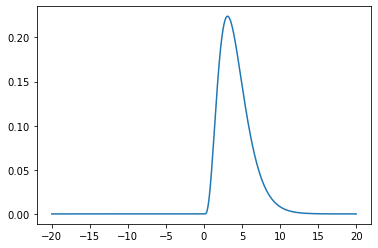

In [ ]:
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.optimize import minimize

shape = 4
scale = 0.1

mus = np.linspace(-20,20,1000)

ys = gamma.pdf(mus,shape,scale)
plt.plot(mus,ys)
np.sum(ys)

We can use a function to return the negative logarithm of the posterior, by adding the prior density of  𝜇  to the log likelihood. This will be calculating:

$\log p(\mu|x,\sigma) \propto \left(\sum_i \log p(x_i|\mu,\sigma)\right) + \log p(\mu)$

(since we are assuming we know $\sigma$, there is no prior on $\sigma$.)

We use the 'log-likelihood' in our code as the product is difficult to manipulate.

#### Create a function to fit a Poisson distribution with the Gamma distribution prior

In [ ]:
def nlposterior(mu):
    loglikelihood_array = poisson.logpmf(x, mu)
    loglikelihood = np.sum(loglikelihood_array)
    prior = gamma.logpdf(mu,shape,scale)
    return -(loglikelihood+prior)

In [ ]:
minimize(nlposterior,5).x

array([12.67057403])

**• Explain the key concepts of MAP inference and how these are implemented in
your code.**

MAP inference aims to maximise the posterior density. Thus within our code we have use the probability density functions and probability mass functions of our the two selected distributions. 

Firstly the we find the log likelihood via the log poisson distribution of $\mu$ given our data x. Then we are able to sum the log values together to find the product of the values. This is our log likelihood. Next we find the log gamma distribution around $\mu$ given the parameters of the distribution; shape = 4 and scale = 0.1. Finally we can add the log likelihood with the log prior to return and return the output for the Poisson Distribution using MAP estimation.

#### Plot of MAP inference

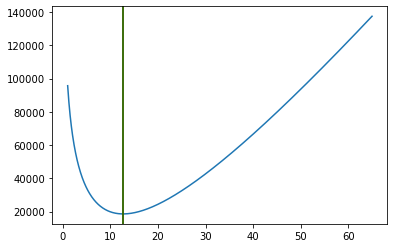

In [ ]:
mus = np.linspace(min(x),max(x),1000) 

ys = []
for mu in mus:
    ys.append(nlposterior(mu))

plt.plot(mus,ys) 

ml_estimate = np.sum(x)/len(x)
map_estimate = minimize(nlposterior,13).x

plt.axvline(ml_estimate,color='red') # add a red vertical line at the ML estimate of mu
plt.axvline(map_estimate,color='green') # add a green vertical line at the MAP estimate of mu
mu = np.mean(QuietDonSentenceLenghts.loc[:,0]) 

**• Discuss how the MAP fit is different from the maximum likelihood fit of the
Poisson distribution and explain why.**

MAP looks to maximise the posterior rather than the likelihood. The only thing that differs is the inclusion of prior in MAP, otherwise they are identical. What this means is that, the likelihood is now weighted with some weight coming from the prior. Essentially MLE is a special case of MAP, where the prior is uniform.

Likelihood: $L(0,x) = P(x|0)$   

Posterior: $P(0|X)= P(x|0)P(0)$

## Task 2 – Classification and Validation

In a classifier, the outputs y that we wish to predict takes dicrete values in a finite range.
- It may be that y is either 0 or 1, so that y $\in$ 0,1. This is known as binary classification and is the classification we will be using in this case.
- For any given input $x_i$, the output $y_i$ can only take one value.

### Load the ATLAS data and lables:
#### Conduct some initial exploration

In [ ]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = np.loadtxt("ATLAS-data.csv",delimiter=',')

labels = np.loadtxt("ATLAS-labels.csv",delimiter=',')

X

array([[243.128,  96.455, 158.618, ...,  -1.651,  -1.445, 157.638],
       [139.751,  74.028, 111.619, ...,  -1.849,   0.664,  68.614],
       [116.217,  73.136,  59.239, ...,   1.442,  -2.288, 140.669],
       ...,
       [131.185,  25.942, 101.981, ...,   0.459,  -0.292, 172.392],
       [142.063,  27.807, 114.4  , ...,   2.913,   0.296, 118.251],
       [ 87.491,  21.139,  65.681, ...,   0.289,   2.719, 266.893]])

In [ ]:
labels

array([0., 0., 0., ..., 1., 1., 0.])

#### Plot of the data points for the first two colums in relation to the labels data

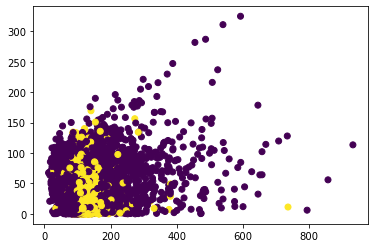

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels)

#### Plot of the scaled data points for the first two colums in relation to the labels data
It is good practice to scale continuous data so that it has a mean of 0 and a standard deviation of 1.

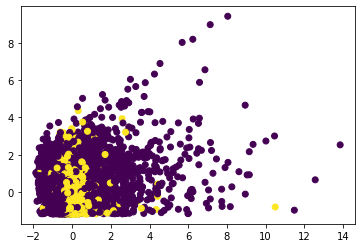

In [ ]:
X_scaled = sklearn.preprocessing.scale(X)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)

### Naive Bayes Classifier

Naive Bayes is an application of Bayes rule to perform classification of data points with an assumption of independence among predictors. The aim is assign each data point to a class c based on its properties.

To do this we use:
* $p(c_k)$, the **prior** probability of a data point belonging to class k.
* $p(x_i | c_k)$, the likelihood of data point i assuming that it belongs to class k.

Naive Bayes assumes that each variable, $x_{i1}, x_{i2},...,x_{ip}$, is independant of the others, given a classification.
This means that:

$$p(x_{i1}, x_{i2},...,x_{ip}|c_k) = \prod^{p}_{j=1}p(x_{i,j}|c_k)$$


#### Naive Bayes Function

$$\mathcal{p}(c_k|x_i) = \frac{{p}(x_i|c_k){p}(c_k)}{{p}(x_i)} $$

#### Properties of Naive Bayes
* Predicting variables must be independent on each other. Which is almost impossible in real life.
* Provides a way of calculating posterior probability $P(c|x)$.
* Performs well with categorical input variables compared to numerical variables. For numerical variables, normal distribution is assumed.

In [ ]:
nbclassifier = GaussianNB() # create our Naive Bayes model

In [ ]:
nbclassifier.fit(X_scaled,labels)

GaussianNB()

#### Naive Bayes Classifier with K-Fold split

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X_scaled,labels):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2000 2001 2002 ... 9997 9998 9999] | test: [   0    1    2 ... 1997 1998 1999]
Train: [   0    1    2 ... 9997 9998 9999] | test: [2000 2001 2002 ... 3997 3998 3999]
Train: [   0    1    2 ... 9997 9998 9999] | test: [4000 4001 4002 ... 5997 5998 5999]
Train: [   0    1    2 ... 9997 9998 9999] | test: [6000 6001 6002 ... 7997 7998 7999]
Train: [   0    1    2 ... 7997 7998 7999] | test: [8000 8001 8002 ... 9997 9998 9999]


In [ ]:
[nbclassifier.fit(X_scaled[train], labels[train]).score(X_scaled[test], labels[test])
    for train, test in k_fold.split(X_scaled)]  

[0.7515, 0.75, 0.741, 0.743, 0.7505]

##### Another way of running K-fold Naive Bayes

In [ ]:
# KFold cross-validation split for confusion matrix

X_folds = np.array_split(X_scaled, 5)
y_folds = np.array_split(labels, 5)
scores = list()
for k in range(5):
    # We use 'list' to cop, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(nbclassifier.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.7515, 0.75, 0.741, 0.743, 0.7505]


* Note that both methods generated the same output.

#### Cross validation score

In [ ]:
cross_val_score(nbclassifier, X_scaled, labels, cv=k_fold, n_jobs=-1)

array([0.7515, 0.75  , 0.741 , 0.743 , 0.7505])

#### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

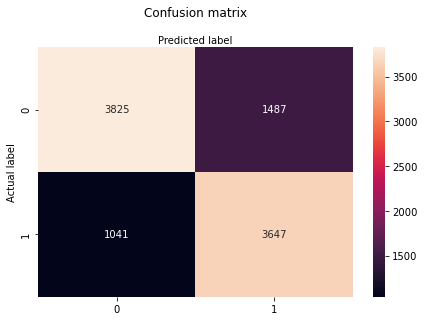

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

labels_pred = cross_val_predict(nbclassifier, X_scaled, labels, cv=k_fold)
conf_matrix = confusion_matrix(labels, labels_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
labels_pred = nbclassifier.predict(X_test)
sns.heatmap(conf_matrix, annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, labels_pred))
print("Precision:",metrics.precision_score(y_test, labels_pred))
print("Recall:",metrics.recall_score(y_test, labels_pred))

Accuracy: 0.7505
Precision: 0.712776176753122
Recall: 0.7876857749469215


####  Explanation of Naïve Bayes classification methods.

### Logistic Regression Classifier
Logistic Regression is a 'Statistical Learning' technique categorized in 'Supervised' Machine Learning (ML) methods dedicated to 'Classification' tasks. It is used to model the probability of a certain class or event existing such as pass/fail. Or in the case of our data: background or signal. This can be called the indicator variable.

#### Properties of Logistic Regression

* A regression model for binary data
* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)


#### Sigmoid  / Logistic Function
* In logistic regression you are performing linear regression but applying a sigmoid function for the outcome:

$$p =1 / 1 + e^{-y}$$

#### Logistic Regression Model

$$logit(px) = log(\frac{px}{1-px}) = B_0 + B_1X$$


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)

In [ ]:
logreg.fit(X_scaled,labels)

LogisticRegression(max_iter=10000)

#### Logistic Regression Classifier with K-Fold split

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X_scaled,labels):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2000 2001 2002 ... 9997 9998 9999] | test: [   0    1    2 ... 1997 1998 1999]
Train: [   0    1    2 ... 9997 9998 9999] | test: [2000 2001 2002 ... 3997 3998 3999]
Train: [   0    1    2 ... 9997 9998 9999] | test: [4000 4001 4002 ... 5997 5998 5999]
Train: [   0    1    2 ... 9997 9998 9999] | test: [6000 6001 6002 ... 7997 7998 7999]
Train: [   0    1    2 ... 7997 7998 7999] | test: [8000 8001 8002 ... 9997 9998 9999]


In [ ]:
[logreg.fit(X_scaled[train], labels[train]).score(X_scaled[test], labels[test])
    for train, test in k_fold.split(X_scaled)]  

[0.749, 0.728, 0.72, 0.735, 0.7165]

##### Another way of running K-fold Logistic Regression

In [ ]:
# Another way of K-fold

X_folds = np.array_split(X_scaled, 5)
y_folds = np.array_split(labels, 5)
scores = list()
for k in range(5):
    # We use 'list' to cop, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(logreg.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.749, 0.728, 0.72, 0.735, 0.7165]


* Note that both methods generated the same output.

#### Cross validation score

In [ ]:
cross_val_score(logreg, X_scaled, labels, cv=k_fold, n_jobs=-1)

array([0.749 , 0.728 , 0.72  , 0.735 , 0.7165])

#### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

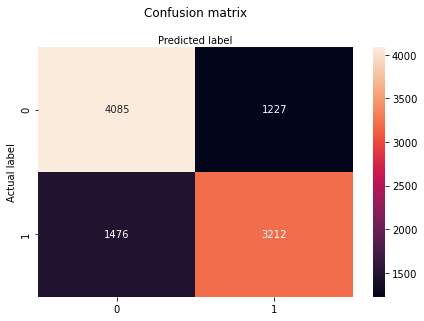

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

labels_pred = cross_val_predict(logreg, X_scaled, labels, cv=k_fold)
conf_matrix = confusion_matrix(labels, labels_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
labels_pred = logreg.predict(X_test)
sns.heatmap(conf_matrix, annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, labels_pred))
print("Precision:",metrics.precision_score(y_test, labels_pred))
print("Recall:",metrics.recall_score(y_test, labels_pred))

Accuracy: 0.7165
Precision: 0.7022653721682848
Recall: 0.6910828025477707


### Explanation of Logistic Regression classification methods

**- Application of scoring and validation methods to compare the performance Naïve Bayes and Logistic Regression for this classification task.**

Evaluating a classifier means measuring how accurately our predicted labels match the actual labels in the evaluation set. For the common case of two distinct labels or classes (binary classification), we typically call the smaller and more interesting of the two classes as positive and the larger/other class as negative. In a spam classification problem, the spam would typically be positive and the ham (non-spam) would be negative. This labeling aims to ensure that identifying the positives is at least as hard as identifying the negatives, although often the test instances are selected so that the classes are of equal cardinality. There are four possible results of what the classification model could do on any given instance, which defines the confusion matrix or contingency table:

• True Positives (TP): Here our classifier labels a positive item as positive, resulting in a win for the classifier. 

• True Negatives (TN): Here the classifier correctly determines that a mem- ber of the negative class deserves a negative label. Another win. 

• False Positives (FP): The classifier mistakenly calls a negative item as a positive, resulting in a “type I” classification error. 

• False Negatives (FN): The classifier mistakenly declares a positive item as negative, resulting in a “type II” classification error.

#### Accuracy
The accuracy is the ratio of correct predictions over total predictions:

$$accuracy = \frac{TP + TN}{TP + TN + FN + FP}$$

#### Precision
The precision looks at all the positive predictions and calculates the amount predicted correctly:

$$precision = \frac{TP}{TP + FP}$$

#### Recall
The recall is the value of correct identified predictions:

$$recall = \frac{TP}{TP + FN}$$

#### F-Score
The F-score is a harmonic mean of precision and recall. A F-score can be used as a general measure of how well the model predicted the results. F-score does the best job of any single statistic, but all four work together to describe the performance of a classifier.

$$ F=2*\frac{precision*recall}{precision + recall}$$


#### Comparison between classifiers
Naive Bayes:
- Accuracy: 0.7505
- Precision: 0.712776176753122
- Recall: 0.7876857749469215
- F-Score: 0.74836106908

Logistic Regression:
- Accuracy: 0.7165
- Precision: 0.7022653721682848
- Recall: 0.6910828025477707
- F-Score: 0.69662921348314

**- Discussion of the conclusions that can be drawn from this comparison.**

Both classifiers have reasonably high accuracy, precision, recall and F-score values. This means for both classifiers we can conclude that:
* The measurements are in close agreement. This suggests the models are able to predict whether an event is classified as background or signal well.
* The measurements are very similar when repeated by the same person or group. Thus, if the 29 measurements were repeated we would likely come to the same classifier outcome of events into background or signal.

It can be seen that Naive Bayes has a slightly higher value for each scoring method. Thus, it is safe to conclude that Naive Bayes classifier is better at predicting whether an event is background or signal.

It is important to note that whilst both models were reasonably positive when predicting events, it was not incredibly precise and roughly 25-30% of events are likely to be predicted incorrectly. There is likely a better model that could be fit to the data that is not discussed in this report. It would be worth looking at Random Forest Classifier, Decision Tree Classifier or XGBClassifier before making any final conclusions on the prediction model.